# Asset Management 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies=pd.read_csv("C:\\Users\\mohan\\Desktop\\ML\\Assignments\\Week_5- Assignment-4 (11-June-2019)\\Assignment-4_ Teclov-data-code-project\\Assignment-4\\companies1.txt",sep="\t",encoding= "ISO-8859-1")
rounds=pd.read_csv("C:\\Users\\mohan\\Desktop\\ML\\Assignments\\Week_5- Assignment-4 (11-June-2019)\\Assignment-4_ Teclov-data-code-project\\Assignment-4\\rounds2.csv",encoding = 'ISO-8859-1')

In [3]:
rounds.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [4]:
rounds.info()       # The variables funding_round_code and raised_amount_usd has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [5]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
len(companies['permalink'].unique())   # so the total number of unique companies are 66368 which is present in the permalink of companies Dataframe

66368

In [8]:
companies['permalink']=companies['permalink'].str.lower()  # Converting everything in permalink to lower case for uniformity
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [9]:
#Finding the number of unique companies in Rounds dataframe

len(rounds.company_permalink.unique())

90247

In [10]:
rounds.company_permalink.describe()  # One more way of identifying the number of unique companies by using describe function

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [11]:
rounds['company_permalink']=rounds['company_permalink'].str.lower()  # Converting everything to lowercase for uniformity
rounds.company_permalink.describe()                                  # unique companies reduced from 90247 to 66370 after uniformity

count                       114949
unique                       66370
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [12]:
# We have 2 extra companies in the round dataframe compared to companies dataframe let's find out what is the real problem 

rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:] # All these permalinks have unusual characters, lets check whether the same in original dataframe too

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [13]:
rounds_original=pd.read_csv("C:\\Users\\mohan\\Desktop\\ML\\Assignments\\Week_5- Assignment-4 (11-June-2019)\\Assignment-4_ Teclov-data-code-project\\Assignment-4\\rounds2.csv",encoding = 'ISO-8859-1')
rounds_original.loc[[29597,31863,45176,58473,101036,109969,113839],:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [14]:
# It seems to appear in original dataframe too but sometimes while importing these files python might introduce these characters especially since encoding is performed.


In [15]:
# Removing the encoding in the rounds dataframe
rounds['company_permalink']=rounds['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [16]:
len(rounds.company_permalink.unique())   # Now the unique list is 66368 same as companies dataframe lets have a look if the same problem exists in companies dataframe too

66368

In [17]:
# companies present in companies df but not in rounds df

companies.loc[~companies['permalink'].isin(rounds['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...
63833,/organization/whodatâs-spaces,Whodatâs Spaces,NaN,Apps,operating,NaN,NaN,NaN,NaN,NaN
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [18]:
# Removing encoding from companies df

companies['permalink']=companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')

In [19]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [20]:
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [21]:
# The encoding issue has been resolved now lets export these new csv files

#Writing rounds file
rounds.to_csv("rounds_clean.csv",sep=',',index=False)

#Writing companies file
companies.to_csv("companies_clean.csv",sep='\t',index=False)

# Data cleaning

In [22]:
# import the clean csv files

rounds=pd.read_csv("C:\\Users\\mohan\\Desktop\\ML\\Assignments\\Week_5- Assignment-4 (11-June-2019)\\Assignment-4_ Teclov-data-code-project\\Assignment-4\\rounds_clean.csv",encoding="ISO-8859-1")
companies=pd.read_csv("C:\\Users\\mohan\\Desktop\\ML\\Assignments\\Week_5- Assignment-4 (11-June-2019)\\Assignment-4_ Teclov-data-code-project\\Assignment-4\\companies_clean.csv",sep="\t",encoding="ISO-8859-1")

In [23]:
# Confirming the number of companies and list are same in both the dataframes

print(len(rounds['company_permalink'].unique()))
print(len(companies['permalink'].unique()))
print(len(companies.loc[~companies['permalink'].isin(rounds['company_permalink']),:]))


66368
66368
0


In [24]:
# Missing value treatment

#Missing values in companies DF
print(companies.isnull().sum(),"\n\n\n")

#Missing values in rounds DF
print(rounds.isnull().sum())

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64 



company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64


In [25]:
# There is no missing values in permalink and company_permalink so let us merge these dataframes

master=pd.merge(companies,rounds,how="inner",left_on="permalink",right_on="company_permalink")
master.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [26]:
# The columns permalink and company_permalink are both the same removing one of them

master.drop(['company_permalink'],axis=1,inplace=True)

In [27]:
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [28]:
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [29]:
# Displaying the number of missing values in percentage comparing to total number of values
round(100*(master.isnull().sum())/len(master.index),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [30]:
# Dropping all the not necesary columns from the master dataframe

master=master.drop(['homepage_url','state_code','region','city','founded_at','funding_round_code'],axis=1)
master.head(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN


In [31]:
# Displaying the number of missing values in percentage comparing to total number of values
round(100*(master.isnull().sum())/len(master.index),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [32]:
# raised_amount_usd is a important columns, let us analyse whether we can impute the column by any means or do we need to drop the rows having null values

In [33]:
# Checking for imputing method

master['raised_amount_usd'].describe()  # There is a outlier existing so imputing the NaNs with mean median doesnt make sense lets just drop the rows with NaNs

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [34]:
# Retaining only those rows which doesnt have NaN value in the raised_amount_usd column
master=master[~np.isnan(master['raised_amount_usd'])]

# Displaying the number of missing values in percentage comparing to total number of values

round(100*(master.isnull().sum())/len(master.index),2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [35]:
# Let us look into the country_code column since it is a category lets convert into type 'category'

country_code=master['country_code'].astype('category')

#displaying the frequency of each category

country_code.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [36]:
round(100*(master['country_code'].value_counts())/len(master.index),5)

USA    65.34294
GBR     5.28544
CAN     2.75487
CHN     2.02930
IND     1.73654
         ...   
HND     0.00105
SOM     0.00105
MKD     0.00105
GGY     0.00105
PRY     0.00105
Name: country_code, Length: 134, dtype: float64

In [37]:
# The percentage of missing values of country_code is just 6% of the whole data ,  we can either drop these values or impute with USA as this is
# frequently repeated. Let's drop the values as we will be left with sufficient dataset even after dropping these values

In [38]:
# For categorical values use pd.isnull as np.isnan doesnt work with objects

master=master[~pd.isnull(master['country_code'])]

# Displaying the number of missing values in percentage comparing to total number of values

round(100*(master.isnull().sum())/len(master.index),2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [39]:
master=master[~pd.isnull(master['category_list'])]

# Displaying the number of missing values in percentage comparing to total number of values

round(100*(master.isnull().sum())/len(master.index),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [40]:
# Writing the clean dataframe 

master.to_csv("master_df.csv",sep=',',index=False)

In [41]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [42]:
100*(len(master.index)/len(rounds.index))   # Approximately we have retained 77% of the whole data which is clean set of data for further analysis

77.01589400516751

# Analysis

## Sector Analysis

In [43]:
df=pd.read_csv("C:\\Users\\mohan\\Desktop\\ML\\Assignments\\Week_5- Assignment-4 (11-June-2019)\\Assignment-4_ Teclov-data-code-project\\Assignment-4\\master_df.csv",sep=",",encoding="ISO-8859-1")
df.head(5)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [44]:
df['funding_round_type'].value_counts()  # Since we have so many funding types narrowing it down to four categories: venture,seed,angel,private_equity

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [45]:
df=df[(df.funding_round_type=="venture") |
      (df.funding_round_type=="seed") |
      (df.funding_round_type=="angel") |
      (df.funding_round_type=="private_equity")]

In [46]:
df['funding_round_type'].value_counts() 

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

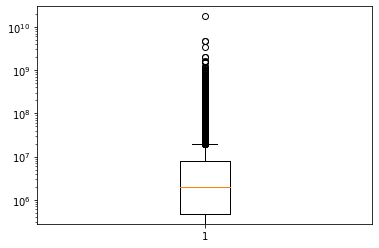

In [47]:
plt.boxplot(df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [48]:
df['raised_amount_usd'].describe()  # The mean is around 9.5 million USD and the median is around 2 million USD.

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

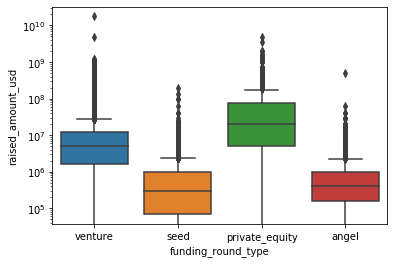

In [49]:
sns.boxplot(x=df['funding_round_type'],y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [50]:
df.pivot_table(values='raised_amount_usd',index='funding_round_type',aggfunc=[np.median,np.mean])

#Since the presence of outliers mean will not be suitable value to continue further , it is advisable to consider the median values for all the fundings

,median,mean
,raised_amount_usd,raised_amount_usd
funding_round_type,,
angel,414906.0,9.715739e+05
private_equity,20000000.0,7.393849e+07
seed,300000.0,7.477937e+05
venture,5000000.0,1.172422e+07


In [51]:
# comparing the median across different funding types

df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

In [52]:
# Since in the problem statement the Teclov company investment range is 5 to 15million USD , only "venture" funding type can be choose as investment type

## Country Analysis

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75124 entries, 0 to 88528
Data columns (total 9 columns):
permalink                  75124 non-null object
name                       75123 non-null object
category_list              75124 non-null object
status                     75124 non-null object
country_code               75124 non-null object
funding_round_permalink    75124 non-null object
funding_round_type         75124 non-null object
funded_at                  75124 non-null object
raised_amount_usd          75124 non-null float64
dtypes: float64(1), object(8)
memory usage: 8.2+ MB


In [54]:
df['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [55]:
df['country_code'].value_counts()

USA    51585
GBR     4049
CAN     2193
CHN     1810
IND     1556
       ...  
MKD        1
SEN        1
PSE        1
BRB        1
PRY        1
Name: country_code, Length: 131, dtype: int64

In [56]:
# Since we have figured it out , our investment can be made on venture sector removing all the other funding sectors

print(df.info(),"\n\n\n")
df=df[df.funding_round_type=='venture']
print(df.info(),"\n\n\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75124 entries, 0 to 88528
Data columns (total 9 columns):
permalink                  75124 non-null object
name                       75123 non-null object
category_list              75124 non-null object
status                     75124 non-null object
country_code               75124 non-null object
funding_round_permalink    75124 non-null object
funding_round_type         75124 non-null object
funded_at                  75124 non-null object
raised_amount_usd          75124 non-null float64
dtypes: float64(1), object(8)
memory usage: 8.2+ MB
None 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 0 to 88523
Data columns (total 9 columns):
permalink                  47809 non-null object
name                       47809 non-null object
category_list              47809 non-null object
status                     47809 non-null object
country_code               47809 non-null object
funding_round_permalink    47809 non

In [57]:
df.head(7)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [58]:
# We are interested only in the top 9 countries which has the highest amount of funding

dfnew=df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

In [59]:
dfnew.head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [60]:
# creating a top9 new dataframe which has the values of the top 9 countries
top9=df[(df.country_code=="USA")|
      (df.country_code=="CHN")|
      (df.country_code=="GBR")|
      (df.country_code=="IND")|
      (df.country_code=="CAN")|
      (df.country_code=="FRA")|
      (df.country_code=="ISR")|
      (df.country_code=="DEU")|
      (df.country_code=="JPN")]
# or a easy code would be

#top9=dfnew[:9]

In [61]:
top9

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
...,...,...,...,...,...,...,...,...,...
88505,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0
88506,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0
88516,/organization/zyrra,Zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0
88518,/organization/zystor,Zystor,Biotechnology,acquired,USA,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0


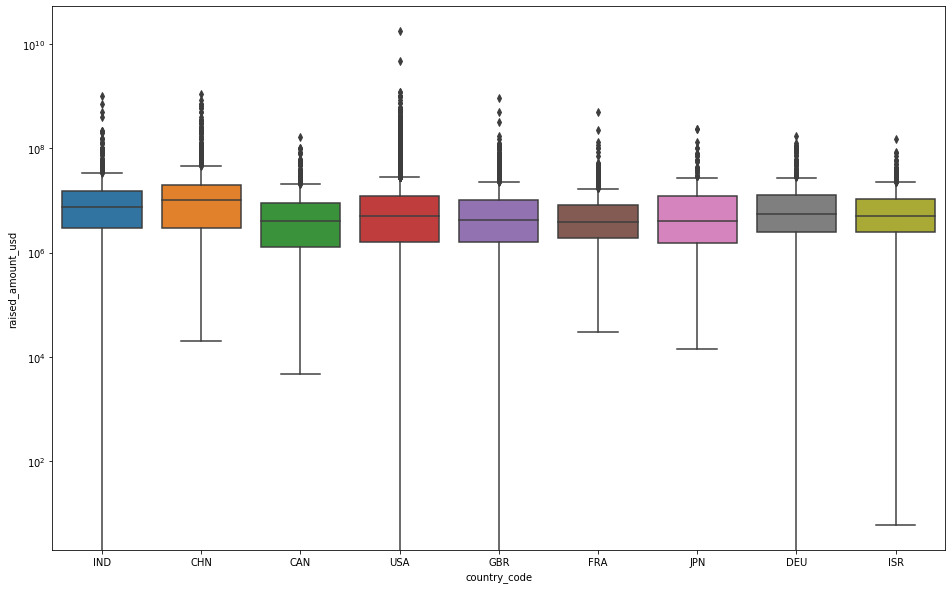

In [62]:
plt.figure(figsize=(16,10))
sns.boxplot(x='country_code',y='raised_amount_usd',data=top9)
plt.yscale('log')
plt.show()

In [63]:
# selecting the top 3 English speaking countries among the list

df=df[(df.country_code=="USA")|
      (df.country_code=="GBR")|
      (df.country_code=="IND")]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


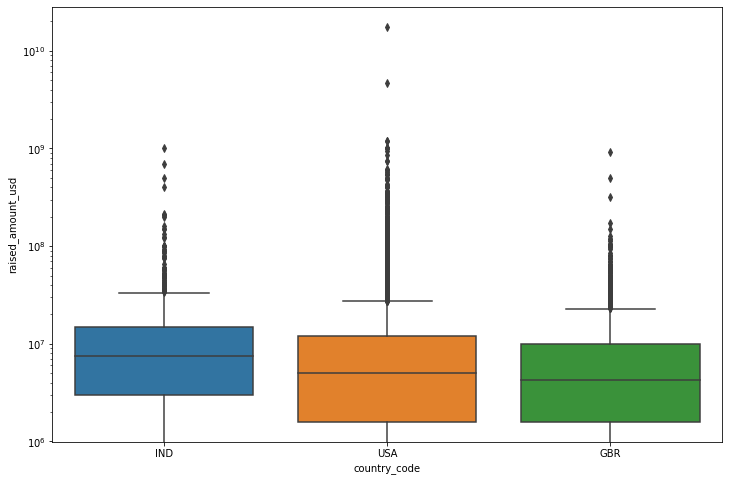

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['country_code'],y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [66]:
df.pivot_table(values='raised_amount_usd',index='country_code',aggfunc=[np.median,np.mean])


,median,mean
,raised_amount_usd,raised_amount_usd
country_code,,
GBR,4260000.0,9.834793e+06
IND,7500000.0,1.741332e+07
USA,5000000.0,1.168706e+07


## Sector Analysis

In [67]:
mapping=pd.read_csv("C:\\Users\\mohan\\Desktop\\ML\\Assignments\\Week_5- Assignment-4 (11-June-2019)\\Assignment-4_ Teclov-data-code-project\\Assignment-4\\mapping.csv",sep=",")

In [68]:
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [69]:
# Extracting the main category from the df dataframe

df['main_category']=df['category_list'].apply(lambda x:x.split("|")[0])
df.head(6)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
21,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education


In [70]:
# Dropping the category_list column

df.drop(['category_list'],axis=1,inplace=True)

In [71]:
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [72]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [73]:
# removing the row with the missing values

mapping=mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [74]:
mapping.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0


In [75]:
df.head(2)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics


In [76]:
mapping['category_list']=mapping['category_list'].str.lower()
df['main_category']=df['main_category'].str.lower()

In [77]:
# Merging all the main_category values with the mapping file's category column , all the values in the main_category column should be present
# in the category_list column of the mapping files

df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...
88270,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
88291,/organization/zopa,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
88292,/organization/zopa,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
88293,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


In [78]:
# values which are in the category_list but not in the main_category

mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


In [79]:
# As we look into the dataset we observe that in many of the places 'na' is replaced by '0' , such as a0lytics , waste ma0gement
# replacing '0' with'na'

mapping['category_list']=mapping['category_list'].apply(lambda x:x.replace('0','na'))
mapping.category_list

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

In [80]:
# merging the two dataframes

df=pd.merge(df,mapping,how="inner",left_on="main_category",right_on="category_list")
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [81]:
# dropping the category list

df.drop(['category_list'],axis=1,inplace=True)
df.head(2)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0


In [82]:
# converting the wide dataframe to long dataframe

# storing the value variables in one series

value_vars=df.columns[9:18]

# take the setdiff() to get the rest of the variables

id_vars=np.setdiff1d(df.columns,value_vars)  # one more way of getting the values

#id_vars=df.columns[0:9]

print(value_vars,"\n\n")
print(id_vars)


Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 


['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [83]:
# converting wide to long dataframe

long_df=pd.melt(df,
               id_vars=list(id_vars),
               value_vars=list(value_vars))
long_df.head(3)

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0


In [84]:
# removing all the rows which have value=0

long_df=long_df[long_df.value==1]
long_df=long_df.drop('value',axis=1)

In [85]:
long_df.head(3)

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable
25828,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,drones,3D Robotics,/organization/3d-robotics,5000000.0,operating,Automotive & Sports
25829,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,drones,3D Robotics,/organization/3d-robotics,14000000.0,operating,Automotive & Sports
25830,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,drones,3D Robotics,/organization/3d-robotics,30000000.0,operating,Automotive & Sports


In [86]:
len(long_df)

38788

In [87]:
# renaming the variable column to sector

long_df=long_df.rename(columns={'variable':'sector'})

In [88]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
country_code               38788 non-null object
funded_at                  38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
main_category              38788 non-null object
name                       38788 non-null object
permalink                  38788 non-null object
raised_amount_usd          38788 non-null float64
status                     38788 non-null object
sector                     38788 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


In [89]:
# summarising the sector wise number and sum of venture investments across three countries

# filter the investment range between 5 and 15m

df=long_df[(long_df['raised_amount_usd']>= 5000000) & (long_df['raised_amount_usd']<=15000000)]

In [90]:
df.groupby(['country_code','sector']).raised_amount_usd.agg(['count','sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

Text(0.5, 1.0, 'Number of Investments')

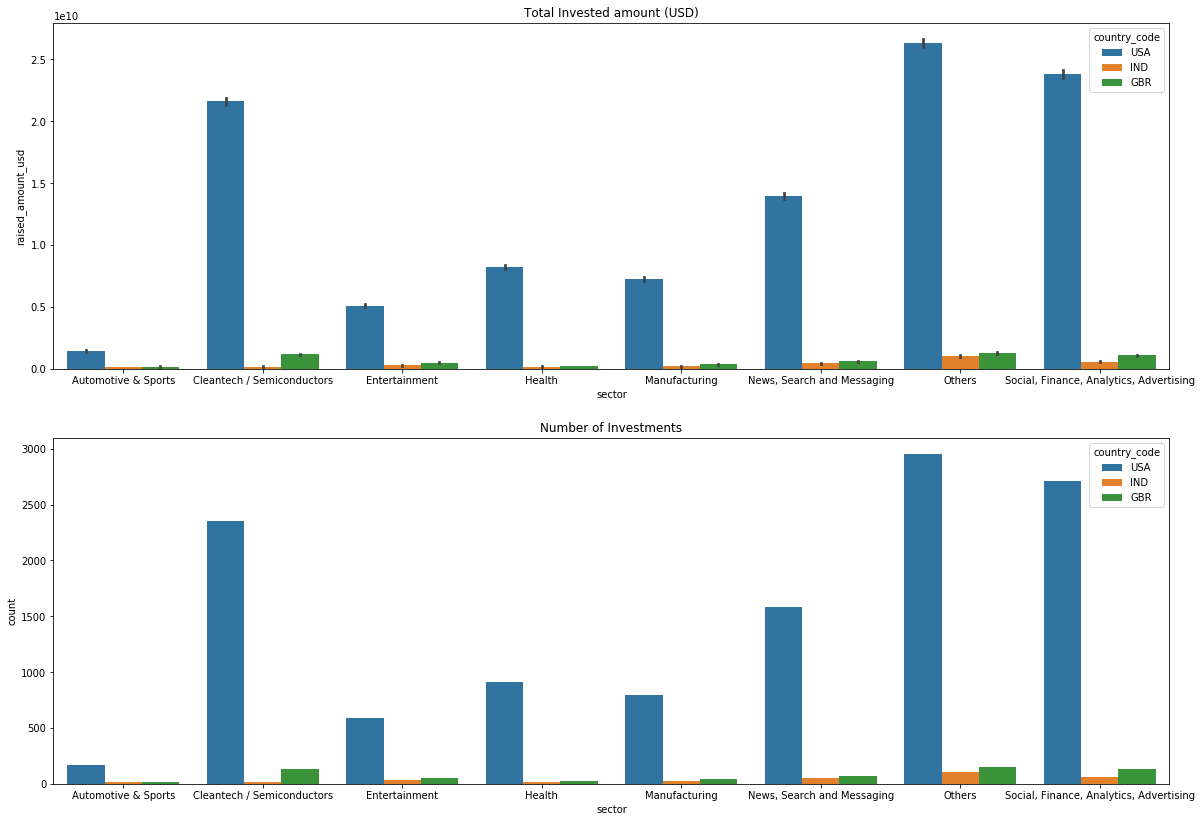

In [91]:
# plotting the graphs

plt.figure(figsize=(20,14))

plt.subplot(2,1,1)

p=sns.barplot(x=df['sector'],y=df['raised_amount_usd'],hue=df['country_code'],estimator=np.sum)
plt.title("Total Invested amount (USD)")

plt.subplot(2,1,2)

q=sns.countplot(x=df['sector'],hue=df['country_code'])
plt.title("Number of Investments")

In [ ]:
Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector.